In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder as OE
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import plot_importance

In [3]:
d = "C:\kaggle_data\credit_card"
lst = os.listdir(d)
print(lst)
train = pd.read_csv(d + '\\' +lst[2])
test = pd.read_csv(d + '\\' +lst[1])
ss = pd.read_csv(d + '\\' +lst[0])

['sample_submission.csv', 'test.csv', 'train.csv']


In [4]:
total = pd.concat([train, test])

In [5]:
for i in ['income_type','edu_type','family_type','house_type','occyp_type']:
    train = pd.concat([train, pd.get_dummies(train[i])],1)
    test = pd.concat([test, pd.get_dummies(test[i])],1)

In [6]:
train.head()
dlst=['index','income_type','edu_type','family_type','house_type','occyp_type']

In [7]:
train = train.drop(dlst,1)
test = test.drop(dlst,1)

In [8]:
train.head()

,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,...,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
0,N,N,0,202500.0,-13899,-4709,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,N,Y,1,247500.0,-11380,-1540,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,Y,Y,0,450000.0,-19087,-4434,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,N,Y,0,202500.0,-15088,-2092,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,Y,Y,0,157500.0,-15037,-2105,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [9]:
labels = ['car', 'reality']
for label in labels:
    enc = LE()
    enc.fit(total[label])
    train[label] = enc.transform(train[label])
    test[label] = enc.transform(test[label])

In [38]:
for i in other:
    print(i)

child_num
income_total
DAYS_BIRTH
DAYS_EMPLOYED
FLAG_MOBIL
work_phone
phone
email
family_size
begin_month
credit
gender_F
gender_M
car_N
car_Y
reality_N
reality_Y
income_type_Commercial associate
income_type_Pensioner
income_type_State servant
income_type_Student
income_type_Working
edu_type_Academic degree
edu_type_Higher education
edu_type_Incomplete higher
edu_type_Lower secondary
edu_type_Secondary / secondary special
family_type_Civil marriage
family_type_Married
family_type_Separated
family_type_Single / not married
family_type_Widow
house_type_Co-op apartment
house_type_House / apartment
house_type_Municipal apartment
house_type_Office apartment
house_type_Rented apartment
house_type_With parents
occyp_type_Accountants
occyp_type_Cleaning staff
occyp_type_Cooking staff
occyp_type_Core staff
occyp_type_Drivers
occyp_type_HR staff
occyp_type_High skill tech staff
occyp_type_IT staff
occyp_type_Laborers
occyp_type_Low-skill Laborers
occyp_type_Managers
occyp_type_Medicine staff
occ

In [11]:
y = train.pop('credit')
X=train

In [15]:
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=1123)

In [18]:
import xgboost as xgb
clf = xgb.XGBRFClassifier(random_state=1123,n_estimators=1000)

In [20]:
import random

In [28]:
random.seed(1123)
clf_models={}
for fold, [train_idx, valid_idx] in enumerate(skf.split(X, y)):
    print(f'===================================={fold+1}============================================')
    train_idx, valid_idx = folds[fold]
    X_train, X_valid, y_train, y_valid = X.iloc[train_idx],X.iloc[valid_idx], y.iloc[train_idx],y.iloc[valid_idx]
    clf = xgb.XGBRFClassifier(random_state=1123,n_estimators=1000)
    clf.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_valid, y_valid)], 
            early_stopping_rounds=30,
           verbose=100)
    clf_models[fold]=clf
    print(f'================================================================================\n\n')

====================================1============================================
[0]	validation_0-merror:0.30243	validation_1-merror:0.30612
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 30 rounds.


====================================2============================================
[0]	validation_0-merror:0.30135	validation_1-merror:0.31009
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 30 rounds.


====================================3============================================
[0]	validation_0-merror:0.30218	validation_1-merror:0.30864
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 30 rounds.


====================================4==========================================

In [30]:
ss.iloc[:,1:]=0
for fold in range(5):
    ss.iloc[:,1:] += clf_models[fold].predict_proba(test)/5

In [31]:
ss.head(20)

,index,0,1,2
0,26457,0.163973,0.195029,0.640997
1,26458,0.163564,0.189008,0.647428
2,26459,0.168085,0.193742,0.638173
3,26460,0.164723,0.188992,0.646285
4,26461,0.171477,0.199242,0.629282
5,26462,0.181475,0.216117,0.602408
6,26463,0.241741,0.630012,0.128248
7,26464,0.168115,0.201754,0.630131
8,26465,0.162368,0.194576,0.643056
9,26466,0.168178,0.204963,0.626859


In [32]:
ss.to_csv('onehot_ensemble.csv', index=False) # 0.7272812144

In [41]:
pd.DataFrame(pred_sk)

,0,1,2
0,0.163389,0.196414,0.640197
1,0.162971,0.189991,0.647038
2,0.168614,0.193441,0.637945
3,0.165516,0.189520,0.644965
4,0.170251,0.201368,0.628380
...,...,...,...
9995,0.163257,0.192279,0.644464
9996,0.170006,0.213607,0.616387
9997,0.156138,0.186886,0.656976
9998,0.155483,0.192258,0.652259


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_box_aspect',
 '_clipon',
 '_clippath',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_axis_map',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',

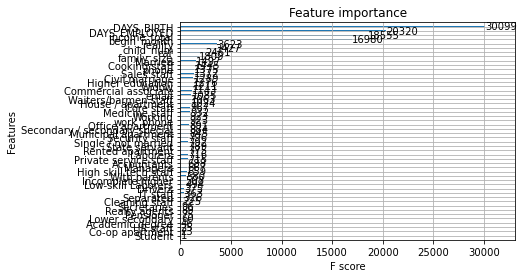

In [44]:
from xgboost import plot_importance
dir(plot_importance(clf_models[0]))

In [43]:
ss.drop(['0','1','2'],1)

,index
0,26457
1,26458
2,26459
3,26460
4,26461
...,...
9995,36452
9996,36453
9997,36454
9998,36455


In [44]:
ss_sk = pd.concat([ss.drop(['0','1','2'],1),pd.DataFrame(pred_sk)],axis=1)

In [45]:
ss_sk.to_csv('one_hot_baseline.csv',index=False)

In [36]:
ss_rk

,index,0,1,2
0,26457,0.164139,0.192881,0.642980
1,26458,0.163794,0.189427,0.646779
2,26459,0.168561,0.194095,0.637344
3,26460,0.165845,0.188210,0.645945
4,26461,0.173882,0.201297,0.624821
...,...,...,...,...
9995,36452,0.162831,0.192138,0.645031
9996,36453,0.170550,0.212975,0.616475
9997,36454,0.155128,0.185603,0.659269
9998,36455,0.155454,0.192071,0.652476


In [46]:
len(X.columns)

51